# 1. Importando bibliotecas

In [1]:
# !pip install pandas_ta
# !pip install yfinance
# !pip install matplotlib
# !pip install pandas_ta
# !pip freeze > requirements.txt
# !pip install -r requirements.txt

In [2]:
from funcoes import *
import matplotlib.pyplot as plt
import pandas_ta as ta
import yfinance as yf
import pandas as pd
import time
from decimal import Decimal
from datetime import date
import os

# 2. Obtendo os dados historicos das ações

## 2.1 Parâmetros

In [3]:
lista_acoes = [    
    'PETR4.SA',    # Petrobras
    'TAEE11.SA',   # Taesa    
    'NVDA',        # Nvidia
    'BBAS3.SA',    # Bradesco
    'NFLX',        # Netflix     
    'EA',          # EA
    'TSLA']        # Tesla


data_inicio = '2015-01-01' # data de inicio do historico que voce deseja obter
data_fim = '2024-09-30'
# data_fim = date.today()   # data final do perido para o historico
# FORMATO-> "AAAA-MM-DD" 

In [4]:
%%time

caminho_pasta = 'Base_dados'
lista_arquivosinicio = [arquivo for arquivo in os.listdir(caminho_pasta) if os.path.isfile(os.path.join(caminho_pasta, arquivo))]

print(lista_arquivosinicio)
# Verifica se a pasta não está vazia
# os.listdir lista os arquivos e diretórios contidos em um diretório especifico, então se não retornar nada, está vazia
if os.listdir(caminho_pasta): # se não está vazio, exclui os arquivos e os cria novamente
    print(f'A pasta "{caminho_pasta}" contém arquivos.')

    # Percorre a lista de arquivos e subdiretórios
    for arq in lista_arquivosinicio:
        caminho = os.path.join(caminho_pasta, arq)
        os.remove(caminho)
        print(f'Arquivo {caminho} excluído.')
    
    hist_data(data_inicio, data_fim, lista_acoes) # FUNCAO PARA OBTERMOS OS DADOS HISTORICOS DAS ACOES INDICADAS NA LISTA

    lista_arquivosdepois = [arquivo for arquivo in os.listdir(caminho_pasta) if os.path.isfile(os.path.join(caminho_pasta, arquivo))]
    print()
    for arq in lista_arquivosdepois:
        caminho = os.path.join(caminho_pasta, arq)
        print(f'Arquivo {caminho} criado.')

else: # se esta vazio, cria os arquivos
    hist_data(data_inicio, data_fim, lista_acoes) # FUNCAO PARA OBTERMOS OS DADOS HISTORICOS DAS ACOES INDICADAS NA LISTA
    lista_arquivosdepois = [arquivo for arquivo in os.listdir(caminho_pasta) if os.path.isfile(os.path.join(caminho_pasta, arquivo))]
    for arq in lista_arquivosdepois:
        caminho = os.path.join(caminho_pasta, arq)
        print(f'Arquivo {caminho} criado.')

"""
    Informacao sobre os dados historicos gerados:
        É gerado um DataFrame com as seguintes variáveis / colunas para cada acao ---> 
            "Date"     : representa a data do registro no formato "AAAA-MM-DD"
            "Open"     : Preco de abertura do dia
            "High"     : Preco mais alto do dia
            "Low"      : Preco mais baixo do dia
            "Close"    : Preco de fechamendo do dia
            "Adj Close": Preco de fechamento ajustado. Esse valor serve para ser usado em dividendos, splits de acoes, etc... (Eventos corporativos)
            "Volume"   : Representa o numero total de acoes negociadas durante o dia
"""


['hist_BBAS3', 'hist_EA', 'hist_NFLX', 'hist_NVDA', 'hist_PETR4', 'hist_TAEE11', 'hist_TSLA']
A pasta "Base_dados" contém arquivos.
Arquivo Base_dados\hist_BBAS3 excluído.
Arquivo Base_dados\hist_EA excluído.
Arquivo Base_dados\hist_NFLX excluído.
Arquivo Base_dados\hist_NVDA excluído.
Arquivo Base_dados\hist_PETR4 excluído.
Arquivo Base_dados\hist_TAEE11 excluído.
Arquivo Base_dados\hist_TSLA excluído.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Arquivo Base_dados\hist_BBAS3.SA criado.
Arquivo Base_dados\hist_EA criado.
Arquivo Base_dados\hist_NFLX criado.
Arquivo Base_dados\hist_NVDA criado.
Arquivo Base_dados\hist_PETR4.SA criado.
Arquivo Base_dados\hist_TAEE11.SA criado.
Arquivo Base_dados\hist_TSLA criado.
CPU times: total: 594 ms
Wall time: 5.48 s


'\n    Informacao sobre os dados historicos gerados:\n        É gerado um DataFrame com as seguintes variáveis / colunas para cada acao ---> \n            "Date"     : representa a data do registro no formato "AAAA-MM-DD"\n            "Open"     : Preco de abertura do dia\n            "High"     : Preco mais alto do dia\n            "Low"      : Preco mais baixo do dia\n            "Close"    : Preco de fechamendo do dia\n            "Adj Close": Preco de fechamento ajustado. Esse valor serve para ser usado em dividendos, splits de acoes, etc... (Eventos corporativos)\n            "Volume"   : Representa o numero total de acoes negociadas durante o dia\n'

# 3. Indicadores técnicos

### 3.1 SMA

In [5]:
%%time

MM_sma(lista_acoes) # FUNCAO PARA OBTER O INDICADOR 'SMA'(SIMPLE MOVING AVERAGE ou MEDIA MOVEL SIMPLES)

CPU times: total: 93.8 ms
Wall time: 312 ms


### 3.2 EMA

In [6]:
%%time

MM_ema(lista_acoes) # FUNCAO PARA OBTER O INDICADOR 'EMA'(EXPONENTIAL MOVING AVERAGE ou MEDIA MOVEL EXPONENCIAL)

CPU times: total: 93.8 ms
Wall time: 317 ms


### 3.3 RSI

In [7]:
%%time

MM_rsi(lista_acoes)

CPU times: total: 125 ms
Wall time: 357 ms


### 3.4 MACD

In [8]:
%%time

MM_macd(lista_acoes)

CPU times: total: 203 ms
Wall time: 449 ms


### 3.5 Bollinger Bands

In [9]:
%%time

MM_bb(lista_acoes) # FUNCAO PARA OBTER OS INDICADORES BB(Bollinger Band) dos ativos

CPU times: total: 141 ms
Wall time: 502 ms


### 3.6 ATR

In [10]:
%%time

MM_atr(lista_acoes) # FUNCAO PARA OBTER O INDICADOR "ATR" (AVERAGE TRUE RANGE)

CPU times: total: 328 ms
Wall time: 541 ms


### 3.7 Indicador Estocástico

In [11]:
%%time

MM_estc(lista_acoes)

CPU times: total: 250 ms
Wall time: 614 ms


### 3.8 Renomeação de arquivo  

In [12]:
caminho_pasta = 'Base_dados'
# Pega o nome dos arquivos da pasta e armazena numa lista\n,

for nome_arquivo in os.listdir(caminho_pasta):
    # Verifica se o arquivo termina com ".SA"
    if nome_arquivo.endswith(".SA"):
        # Gera o novo nome sem o ".SA"
        novo_nome = nome_arquivo[:-3]
        # Caminho completo para o arquivo antigo e o novo nome
        caminho_antigo = os.path.join(caminho_pasta, nome_arquivo)
        caminho_novo = os.path.join(caminho_pasta, novo_nome)
        # Renomeia o arquivo
        os.rename(caminho_antigo, caminho_novo)
        print(f"Arquivo renomeado: {nome_arquivo} -> {novo_nome}")

Arquivo renomeado: hist_BBAS3.SA -> hist_BBAS3
Arquivo renomeado: hist_PETR4.SA -> hist_PETR4
Arquivo renomeado: hist_TAEE11.SA -> hist_TAEE11


In [13]:
#lista_colunaslixo = ['Unnamed: 0.5','Unnamed: 0.4','Unnamed: 0.3','Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0']
# Defina o caminho da pasta\n
colunas_oficiais = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_10', 'EMA_10', 'RSI_10', 'MACD', 'MACD_Histogram', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0', 'ATRr_14', 'stoch_k', 'stoch_d']

# Pega o nome dos arquivos da pasta e armazena numa lista\n,
lista_arquivos = [arquivo for arquivo in os.listdir(caminho_pasta) if os.path.isfile(os.path.join(caminho_pasta, arquivo))]

print(f"{caminho_pasta}\n{colunas_oficiais}\n{lista_arquivos}")


Base_dados
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_10', 'EMA_10', 'RSI_10', 'MACD', 'MACD_Histogram', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0', 'ATRr_14', 'stoch_k', 'stoch_d']
['hist_BBAS3', 'hist_EA', 'hist_NFLX', 'hist_NVDA', 'hist_PETR4', 'hist_TAEE11', 'hist_TSLA']


# 4. Data Wrangling

### 4.2 Removendo colunas que estão com valores NAN

In [14]:
%%time

for arq in lista_arquivos:
    df = pd.read_csv(f"Base_dados/{arq}") 
    df.dropna(inplace=True)  # Remove linhas com valores NAN
    df.to_csv(f"Base_dados/{arq}")

CPU times: total: 344 ms
Wall time: 606 ms


### 4.3 Removendo colunas indesejadas

In [15]:
for arq in lista_arquivos:
    df = pd.read_csv(f"Base_dados/{arq}") 
    # Remover as colunas que não estão nas colunas oficiais
    colunas_lixo = [col for col in df.columns if col not in colunas_oficiais]
    
    if colunas_lixo:
        df = df.drop(columns=colunas_lixo)
        
    df.to_csv(f"Base_dados/{arq}", index=True)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_10,EMA_10,RSI_10,MACD,MACD_Histogram,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,ATRr_14,stoch_k,stoch_d
0,2015-01-30,13.597333,13.831333,13.533333,13.573333,13.573333,45105000,13.367867,13.520391,48.883153,-0.212373,0.070575,12.580719,13.550367,14.520014,14.311748,0.511843,0.490310,69.835782,67.047518
1,2015-02-02,13.598000,14.130000,13.553333,14.062667,14.062667,62238000,13.487000,13.618986,59.707146,-0.152993,0.103964,12.650410,13.522467,14.394524,12.897899,0.809728,0.498291,85.287943,74.064632
2,2015-02-03,14.214667,14.691333,14.084667,14.557333,14.557333,72393000,13.663200,13.789595,67.449100,-0.065267,0.153352,12.588330,13.550033,14.511736,14.194843,1.023706,0.510093,89.772115,81.631947
3,2015-02-04,14.552667,14.765333,14.453333,14.570000,14.570000,49581000,13.809733,13.931487,67.626081,0.005219,0.179070,12.538274,13.574267,14.610259,15.264068,0.980570,0.492497,94.020666,89.693575
4,2015-02-05,14.658667,15.032000,14.642667,14.732667,14.732667,52843500,13.938867,14.077156,69.956870,0.073359,0.197769,12.472241,13.607733,14.743225,16.688921,0.995351,0.489835,91.376386,91.723056


In [16]:
%%time

# Pegar os nomes das colunas e salvar em uma lista
lista_colunass = list(df.columns)

# Exibir a lista de colunas
print(lista_colunass)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_10', 'EMA_10', 'RSI_10', 'MACD', 'MACD_Histogram', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0', 'ATRr_14', 'stoch_k', 'stoch_d']
CPU times: total: 0 ns
Wall time: 1 ms


### 4.2 Convertendo os valores das Colunas

In [17]:
#df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
nome_colunas = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_10', 'EMA_10', 'RSI_10', 'MACD', 'MACD_Histogram', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0', 'ATRr_14', 'stoch_k', 'stoch_d']
#nomes_dascolunas = df.columns.tolist()

for arq in lista_arquivos:
    print(arq)
    df = pd.read_csv(f"Base_dados/{arq}")    
    for col in nome_colunas:
        df[col] = df[col].astype(float)  # Converte uma coluna em float
        df.to_csv(f"Base_dados/{arq}") # Salvando o resultado no DataFrame
    df['NOME_ACAO'] = arq # ?

for arq in lista_arquivos:
    print(arq)
    df = pd.read_csv(f"Base_dados/{arq}")    
    print(df)


hist_BBAS3
hist_EA
hist_NFLX
hist_NVDA
hist_PETR4
hist_TAEE11
hist_TSLA
hist_BBAS3
      Unnamed: 0.1  Unnamed: 0        Date       Open       High        Low  \
0                0           0  2015-01-29  11.125000  11.130000  10.720000   
1                1           1  2015-01-30  10.650000  10.665000  10.300000   
2                2           2  2015-02-02  10.395000  10.505000   9.950000   
3                3           3  2015-02-03  10.240000  10.555000  10.135000   
4                4           4  2015-02-04  10.490000  11.215000  10.490000   
...            ...         ...         ...        ...        ...        ...   
2401          2401        2401  2024-09-23  27.500000  27.549999  27.270000   
2402          2402        2402  2024-09-24  27.700001  27.920000  27.370001   
2403          2403        2403  2024-09-25  27.500000  27.559999  27.209999   
2404          2404        2404  2024-09-26  27.450001  27.660000  27.280001   
2405          2405        2405  2024-09-27  27.4

### 4.4 Descobrir se há Outliers

Axes(0.125,0.11;0.775x0.77)
Open


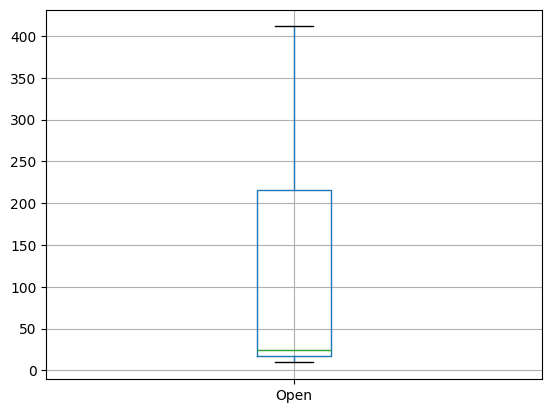

Axes(0.125,0.11;0.775x0.77)
High


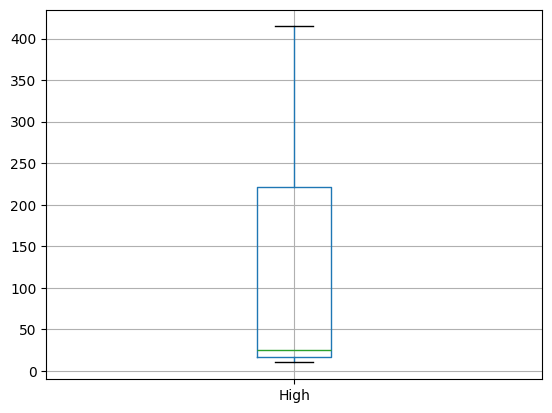

Axes(0.125,0.11;0.775x0.77)
Low


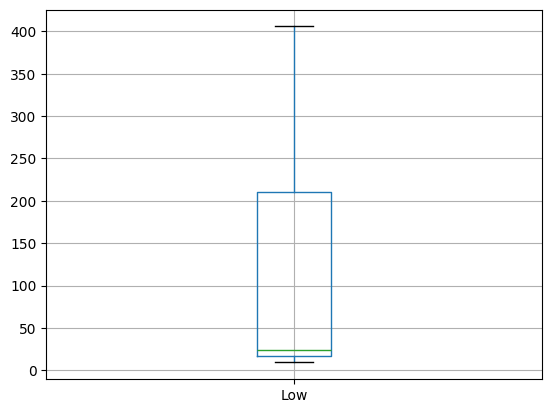

Axes(0.125,0.11;0.775x0.77)
Close


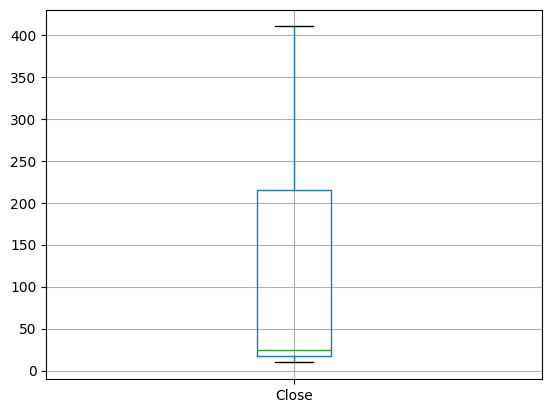

Axes(0.125,0.11;0.775x0.77)
Adj Close


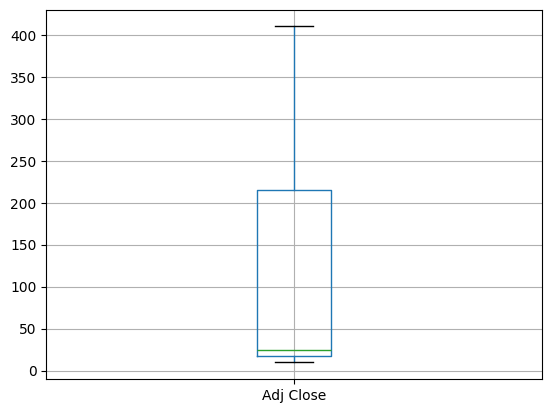

Axes(0.125,0.11;0.775x0.77)
Volume


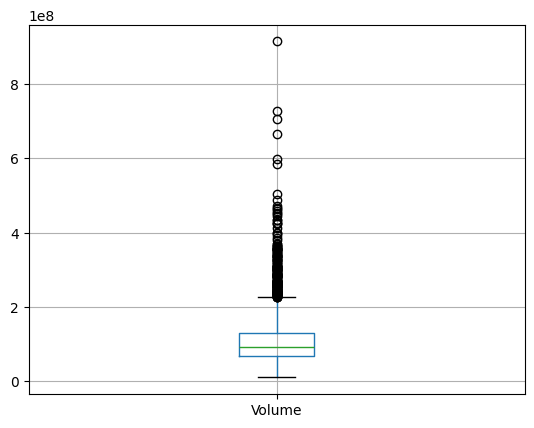

Axes(0.125,0.11;0.775x0.77)
SMA_10


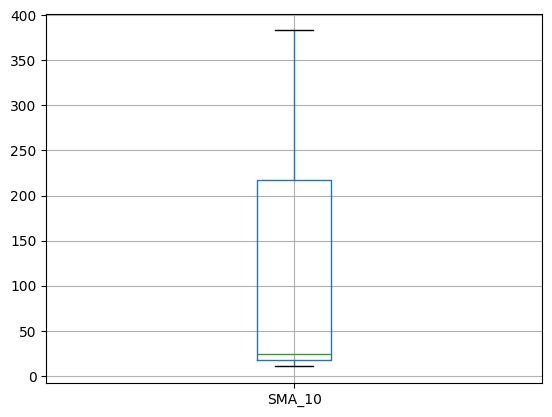

Axes(0.125,0.11;0.775x0.77)
EMA_10


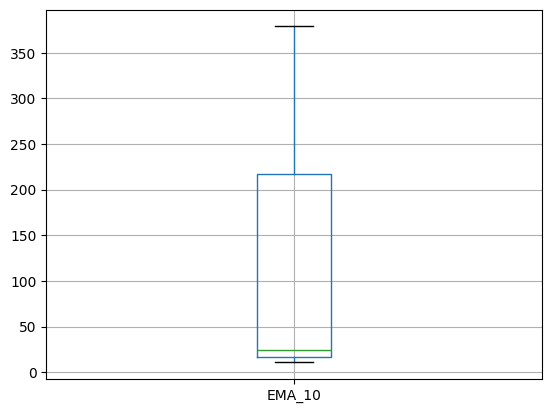

Axes(0.125,0.11;0.775x0.77)
RSI_10


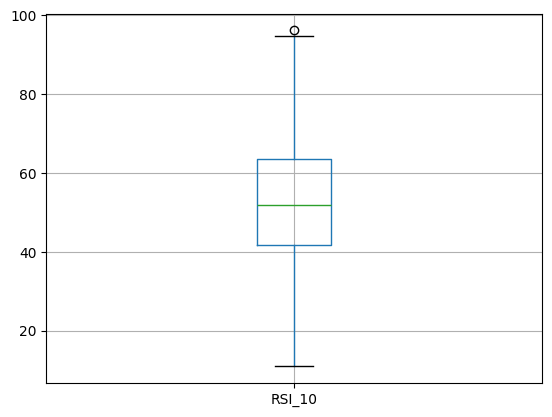

Axes(0.125,0.11;0.775x0.77)
MACD


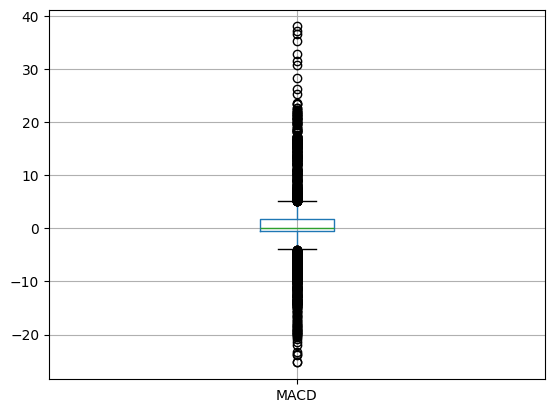

Axes(0.125,0.11;0.775x0.77)
MACD_Histogram


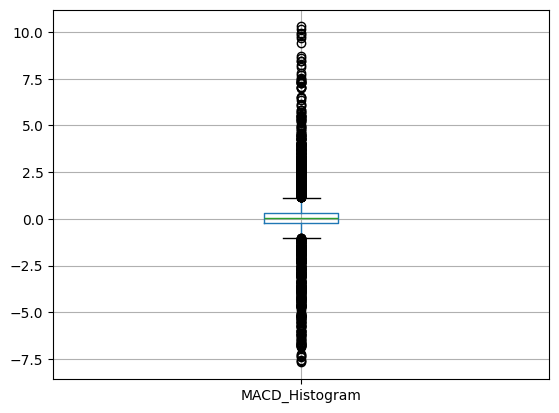

Axes(0.125,0.11;0.775x0.77)
BBL_20_2.0


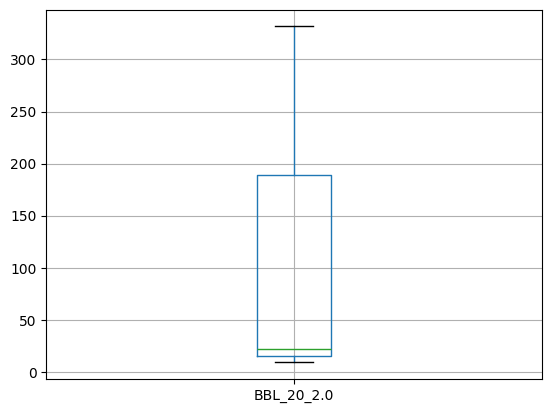

Axes(0.125,0.11;0.775x0.77)
BBM_20_2.0


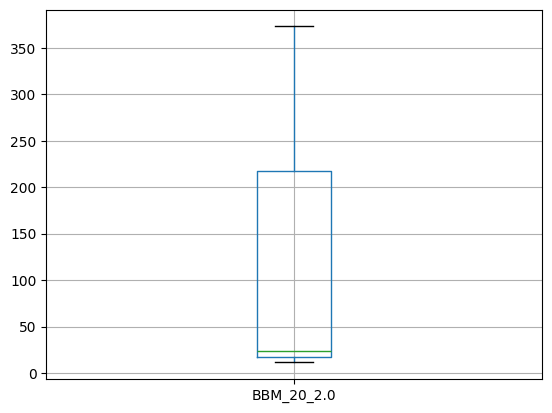

Axes(0.125,0.11;0.775x0.77)
BBU_20_2.0


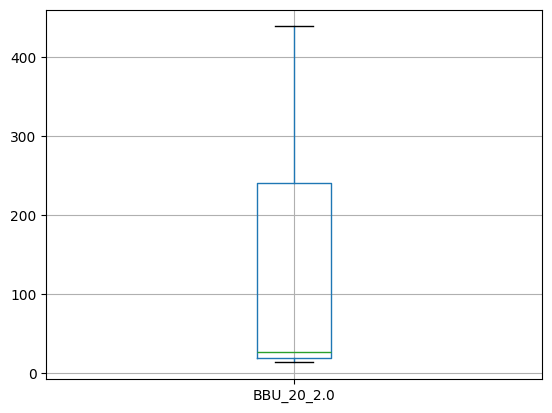

Axes(0.125,0.11;0.775x0.77)
BBB_20_2.0


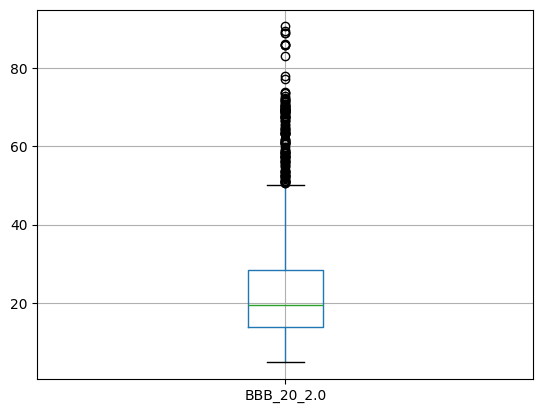

Axes(0.125,0.11;0.775x0.77)
BBP_20_2.0


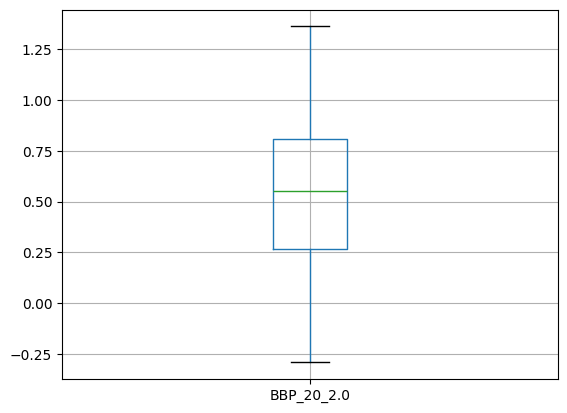

Axes(0.125,0.11;0.775x0.77)
ATRr_14


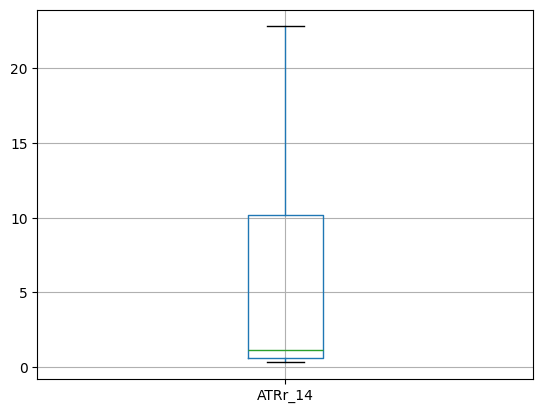

Axes(0.125,0.11;0.775x0.77)
stoch_k


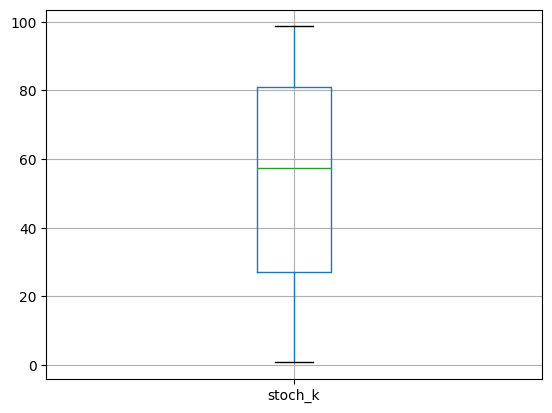

Axes(0.125,0.11;0.775x0.77)
stoch_d


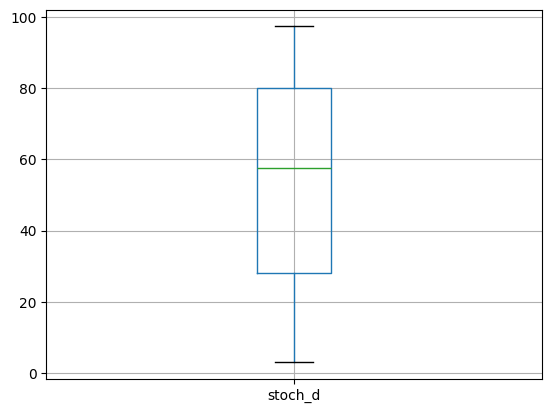

In [18]:
for colout in nome_colunas:
    a = df.boxplot(column=[colout])
    print(f"{a}\n{colout}")
    a = 0
    plt.show()
    

### Tratando Outliers

Tratando base de dados 1: hist_BBAS3
Tratando a coluna: Open
Tratando a coluna: High
Tratando a coluna: Low
Tratando a coluna: Close
Tratando a coluna: Adj Close
Tratando a coluna: Volume
Tratando a coluna: SMA_10
Tratando a coluna: EMA_10
Tratando a coluna: RSI_10
Tratando a coluna: MACD
Tratando a coluna: MACD_Histogram
Tratando a coluna: BBL_20_2.0
Tratando a coluna: BBM_20_2.0
Tratando a coluna: BBU_20_2.0
Tratando a coluna: BBB_20_2.0
Tratando a coluna: BBP_20_2.0
Tratando a coluna: ATRr_14
Tratando a coluna: stoch_k
Tratando a coluna: stoch_d
   Unnamed: 0.1  Unnamed: 0        Date    Open    High     Low   Close  \
0             0           0  2015-01-29  11.125  11.130  10.720  10.775   
1             1           1  2015-01-30  10.650  10.665  10.300  10.330   
2             2           2  2015-02-02  10.395  10.505   9.950  10.100   
3             3           3  2015-02-03  10.240  10.555  10.135  10.425   
4             4           4  2015-02-04  10.490  11.215  10.490  11.15

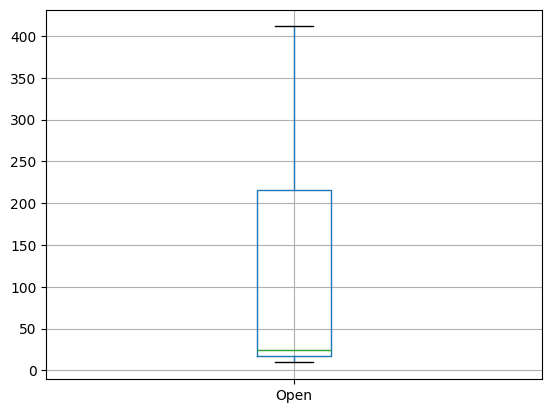

Axes(0.125,0.11;0.775x0.77)
High


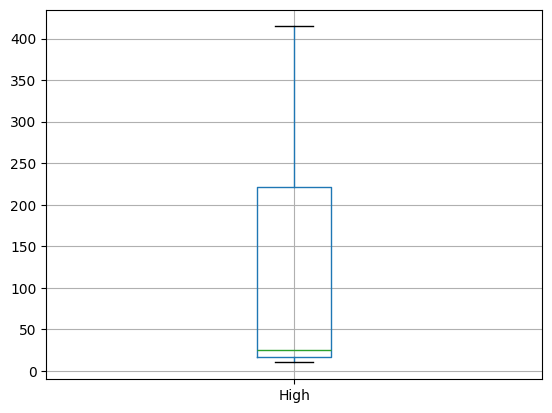

Axes(0.125,0.11;0.775x0.77)
Low


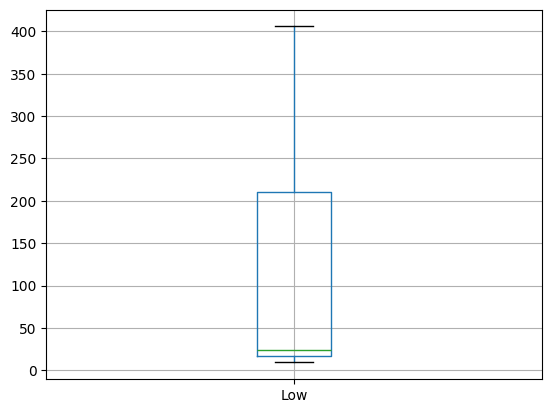

Axes(0.125,0.11;0.775x0.77)
Close


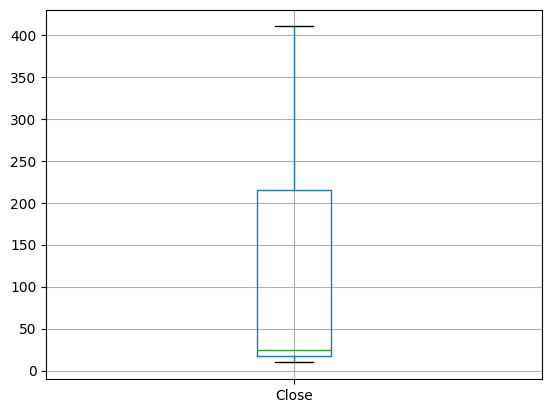

Axes(0.125,0.11;0.775x0.77)
Adj Close


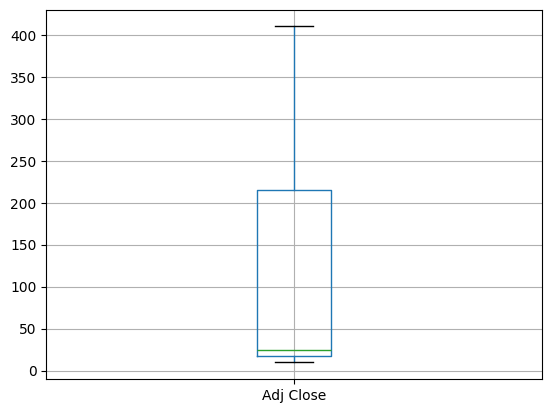

Axes(0.125,0.11;0.775x0.77)
Volume


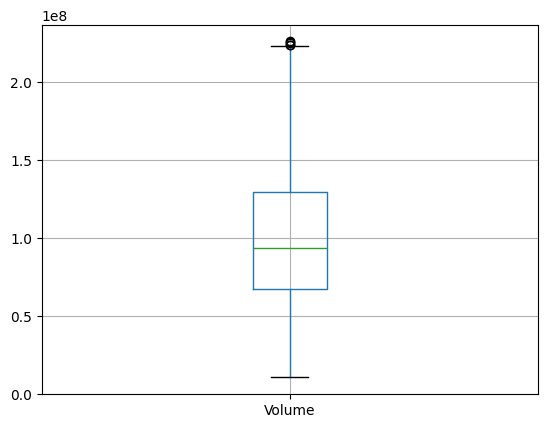

Axes(0.125,0.11;0.775x0.77)
SMA_10


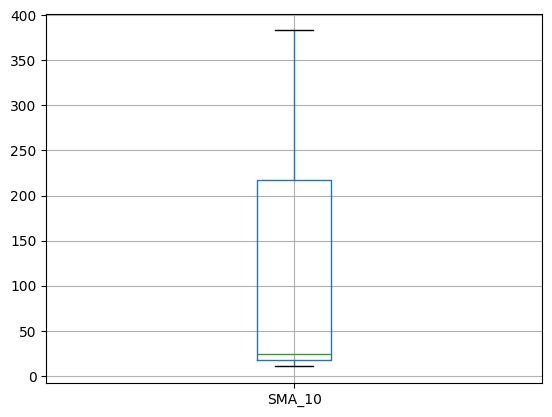

Axes(0.125,0.11;0.775x0.77)
EMA_10


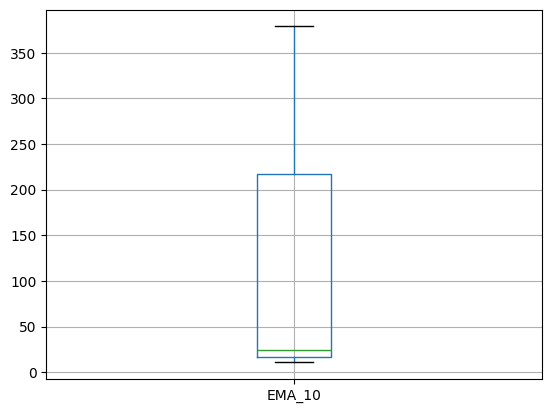

Axes(0.125,0.11;0.775x0.77)
RSI_10


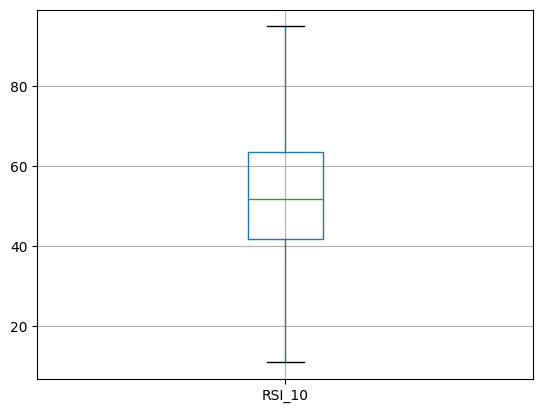

Axes(0.125,0.11;0.775x0.77)
MACD


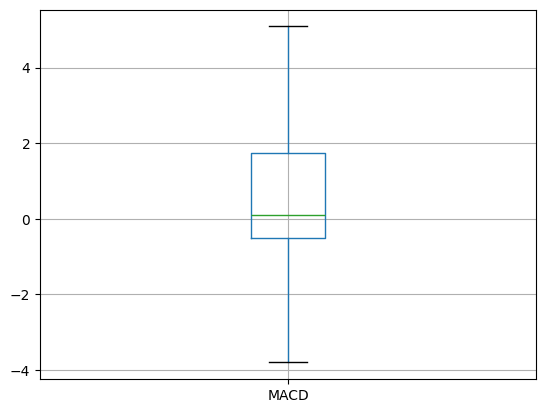

Axes(0.125,0.11;0.775x0.77)
MACD_Histogram


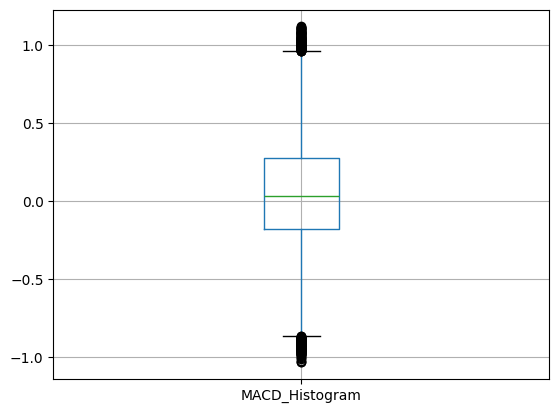

Axes(0.125,0.11;0.775x0.77)
BBL_20_2.0


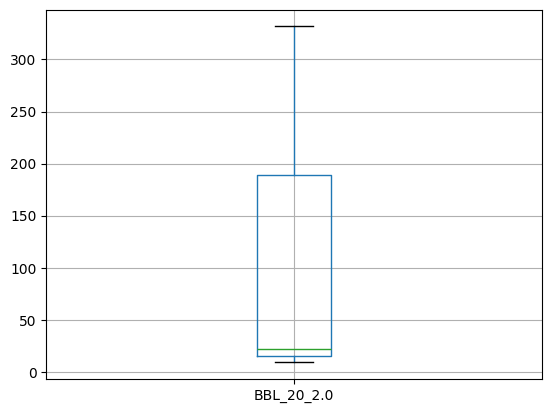

Axes(0.125,0.11;0.775x0.77)
BBM_20_2.0


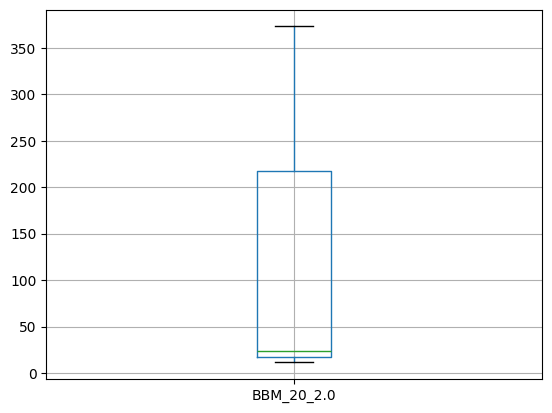

Axes(0.125,0.11;0.775x0.77)
BBU_20_2.0


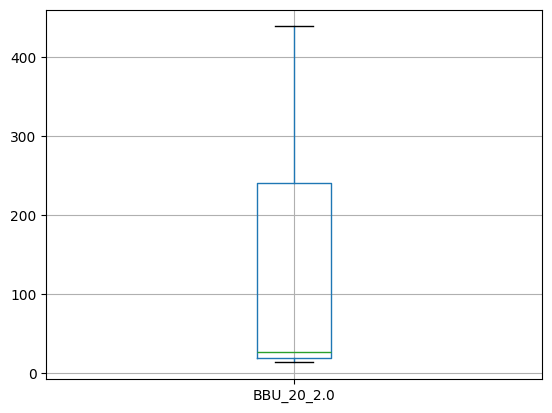

Axes(0.125,0.11;0.775x0.77)
BBB_20_2.0


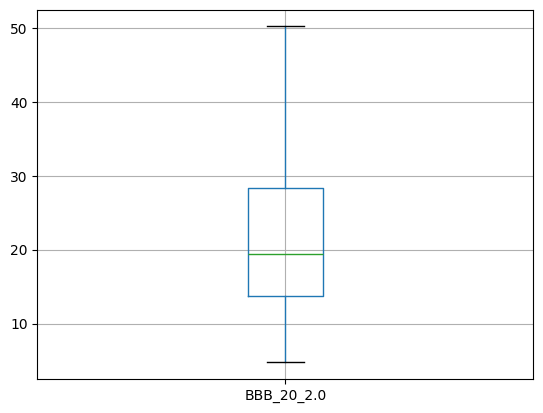

Axes(0.125,0.11;0.775x0.77)
BBP_20_2.0


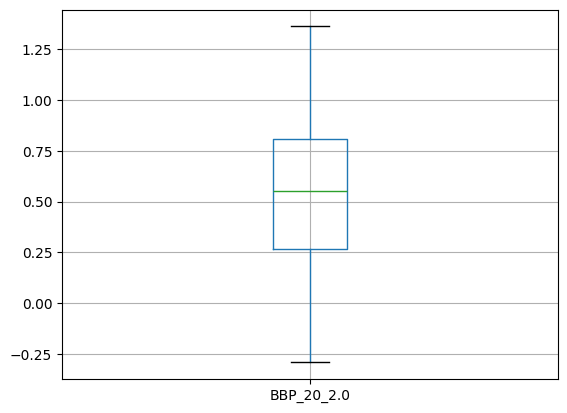

Axes(0.125,0.11;0.775x0.77)
ATRr_14


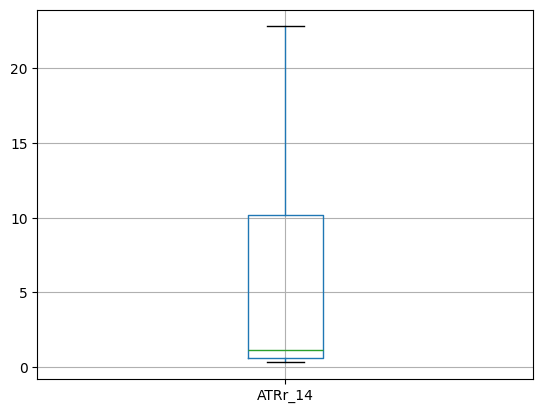

Axes(0.125,0.11;0.775x0.77)
stoch_k


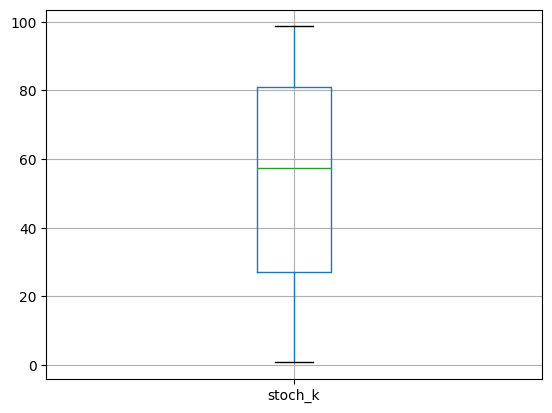

Axes(0.125,0.11;0.775x0.77)
stoch_d


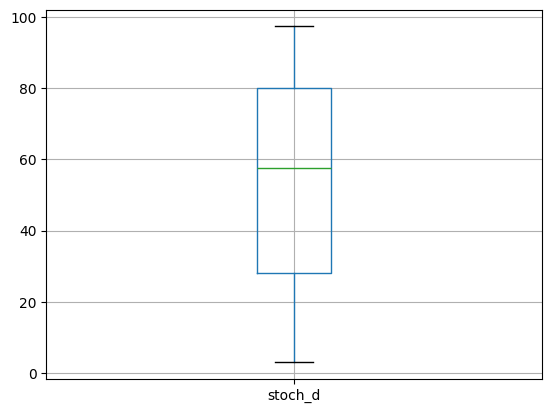

In [19]:
# lista_arquivos VARIÁVEL COM O NOME DAS BASES

# Colunas para tratar os outliers
# print(type(df))
# print(df)

# Laço para percorrer cada base de dados (cada arquivo)
for i, arq in enumerate(lista_arquivos):
    print(f"Tratando base de dados {i + 1}: {arq}")
    
    df = pd.read_csv(f"Base_dados/{arq}")
    
    # Percorrer cada coluna que precisa ser tratada
    for coluna in nome_colunas:
        # Verificar se a coluna existe no DataFrame (evitar erros)
        if coluna in df.columns:
            print(f"Tratando a coluna: {coluna}")

            # Calcular o IQR para a coluna atual
            Q1 = df[coluna].quantile(0.25)
            Q3 = df[coluna].quantile(0.75)
            IQR = Q3 - Q1

            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            # Marcar os outliers como NaN
            df[coluna] = df[coluna].apply(lambda x: None if (x < limite_inferior or x > limite_superior) else x)

            # Interpolar os valores NaN (outliers) usando interpolação linear
            df[coluna] = df[coluna].interpolate()

        else:
            print(f"Coluna {coluna} não encontrada no DataFrame.")
    
    # Exibir uma amostra da base tratada para verificação
    print(df.head())
    
for colout in nome_colunas:
    a = df.boxplot(column=[colout])
    print(f"{a}\n{colout}")
    a = 0
    plt.show()
# # # Opcional: Salvar os outliers em um arquivo CSV
# # outliers.to_csv('outliers_Volume.csv', index=False)


### 4.1 Definindo a coluna 'DATE' como indice e removendo demais colunas indesejadas

In [20]:
%%time
# define o indice no final pois depois de algum tratamento ele muda

# Percorrer cada arquivo na lista de arquivos
for arq in lista_arquivos:
    # Ler o arquivo CSV
    df = pd.read_csv(f"Base_dados/{arq}")
    
    # Remover as colunas que não estão nas colunas oficiais
    colunas_lixo = [col for col in df.columns if col not in colunas_oficiais]
    
    if colunas_lixo:
        df = df.drop(columns=colunas_lixo)
    
    # Verificar se a coluna 'Date' existe e definir como índice
    if 'Date' in df.columns:
        df = df.set_index('Date')
    
    # Salvar o DataFrame atualizado no mesmo arquivo
    df.to_csv(f"Base_dados/{arq}", index=True)

    # Exibir as primeiras linhas do DataFrame para verificação (opcional)
    print(df.head())


              Open    High     Low   Close  Adj Close      Volume   SMA_10  \
Date                                                                         
2015-01-29  11.125  11.130  10.720  10.775   5.797369  10845400.0  11.1995   
2015-01-30  10.650  10.665  10.300  10.330   5.557941  14294200.0  11.1175   
2015-02-02  10.395  10.505   9.950  10.100   5.434191  17874200.0  11.0175   
2015-02-03  10.240  10.555  10.135  10.425   5.609053  16762600.0  10.9550   
2015-02-04  10.490  11.215  10.490  11.150   5.999127  18676800.0  10.9370   

               EMA_10     RSI_10      MACD  MACD_Histogram  BBL_20_2.0  \
Date                                                                     
2015-01-29  11.171516  35.588254 -0.051886       -0.026010   10.743775   
2015-01-30  11.018513  27.481701 -0.115687       -0.071849   10.558187   
2015-02-02  10.851511  24.302583 -0.182703       -0.111091   10.350315   
2015-02-03  10.773963  35.937892 -0.207200       -0.108471   10.253214   
2015-02-0

In [21]:
print(lista_colunass)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_10', 'EMA_10', 'RSI_10', 'MACD', 'MACD_Histogram', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0', 'ATRr_14', 'stoch_k', 'stoch_d']


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2432 entries, 2015-01-30 to 2024-09-27
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            2432 non-null   float64
 1   High            2432 non-null   float64
 2   Low             2432 non-null   float64
 3   Close           2432 non-null   float64
 4   Adj Close       2432 non-null   float64
 5   Volume          2432 non-null   float64
 6   SMA_10          2432 non-null   float64
 7   EMA_10          2432 non-null   float64
 8   RSI_10          2432 non-null   float64
 9   MACD            2432 non-null   float64
 10  MACD_Histogram  2432 non-null   float64
 11  BBL_20_2.0      2432 non-null   float64
 12  BBM_20_2.0      2432 non-null   float64
 13  BBU_20_2.0      2432 non-null   float64
 14  BBB_20_2.0      2432 non-null   float64
 15  BBP_20_2.0      2432 non-null   float64
 16  ATRr_14         2432 non-null   float64
 17  stoch_k         2432 no

In [23]:
df.isnull().sum()

Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
SMA_10            0
EMA_10            0
RSI_10            0
MACD              0
MACD_Histogram    0
BBL_20_2.0        0
BBM_20_2.0        0
BBU_20_2.0        0
BBB_20_2.0        0
BBP_20_2.0        0
ATRr_14           0
stoch_k           0
stoch_d           0
dtype: int64